## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[157.   139.   119.  ]
   [153.75 135.75 115.75]
   [167.5  149.5  129.5 ]
   ...
   [177.75 160.75 140.75]
   [173.5  156.5  136.5 ]
   [170.   153.   133.  ]]

  [[168.5  150.5  130.5 ]
   [170.25 152.25 132.25]
   [145.5  127.5  107.5 ]
   ...
   [176.25 159.25 139.25]
   [173.   156.   136.  ]
   [159.25 142.25 122.25]]

  [[169.   151.   131.  ]
   [160.   142.   122.  ]
   [162.5  144.5  124.5 ]
   ...
   [168.75 151.75 131.75]
   [171.5  154.5  134.5 ]
   [169.5  152.5  132.5 ]]

  ...

  [[ 85.    74.    68.  ]
   [ 86.75  75.75  69.75]
   [ 97.25  86.25  80.25]
   ...
   [211.5  205.5  191.5 ]
   [212.25 206.25 192.25]
   [209.   203.   189.  ]]

  [[ 77.5   66.5   60.5 ]
   [ 80.5   69.5   63.5 ]
   [ 85.5   74.5   68.5 ]
   ...
   [210.25 204.25 190.25]
   [216.75 210.75 196.75]
   [214.75 208.75 194.75]]

  [[ 69.75  58.75  52.75]
   [ 83.25  72.25  66.25]
   [ 90.5   79.5   73.5 ]
   ...
   [209.5  203.5  189.5 ]
   [208.25 202.25 188.25]
   [208.   202.   18

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [24]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 245s 111ms/step - loss: 0.7359 - accuracy: 0.7716 - val_loss: 0.4602 - val_accuracy: 0.8542
Epoch 2/10
2197/2197 [==============================] - 231s 105ms/step - loss: 0.3577 - accuracy: 0.8860 - val_loss: 0.2464 - val_accuracy: 0.9198
Epoch 3/10
2197/2197 [==============================] - 238s 108ms/step - loss: 0.2322 - accuracy: 0.9250 - val_loss: 0.2156 - val_accuracy: 0.9289
Epoch 4/10
2197/2197 [==============================] - 236s 107ms/step - loss: 0.1667 - accuracy: 0.9455 - val_loss: 0.1922 - val_accuracy: 0.9388
Epoch 5/10
2197/2197 [==============================] - 240s 109ms/step - loss: 0.1217 - accuracy: 0.9597 - val_loss: 0.1949 - val_accuracy: 0.9395
Epoch 6/10
2197/2197 [==============================] - 241s 109ms/step - loss: 0.1000 - accuracy: 0.9669 - val_loss: 0.2110 - val_accuracy: 0.9404
Epoch 7/10
2197/2197 [==============================] - 255s 116ms/step - loss: 0.0869 - accuracy: 0.9719 - val_

## Model Evaluation

In [25]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 129s 58ms/step - loss: 0.0166 - accuracy: 0.9946


In [26]:
print(train_loss,train_acc)

0.016632989048957825 0.994608461856842


In [27]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 18s 32ms/step - loss: 0.1090 - accuracy: 0.9714


In [28]:
print(val_loss,val_acc)

0.1089605838060379 0.9713749289512634


### Saving Model

In [30]:
model.save("trained_model.keras")

In [31]:
training_history.history

{'loss': [0.7358786463737488,
  0.3577343225479126,
  0.232152059674263,
  0.16670377552509308,
  0.12174735963344574,
  0.10001128911972046,
  0.08693579584360123,
  0.06972283124923706,
  0.05872055143117905,
  0.055152397602796555],
 'accuracy': [0.7715626955032349,
  0.8859663009643555,
  0.9250302314758301,
  0.9455010890960693,
  0.9597411155700684,
  0.966896653175354,
  0.9719183444976807,
  0.9780212044715881,
  0.9820613265037537,
  0.9824027419090271],
 'val_loss': [0.46015459299087524,
  0.2463672012090683,
  0.21557262539863586,
  0.19224804639816284,
  0.19493414461612701,
  0.21097047626972198,
  0.14378738403320312,
  0.16329389810562134,
  0.14206787943840027,
  0.10896062850952148],
 'val_accuracy': [0.8541998863220215,
  0.9198155999183655,
  0.9288641214370728,
  0.9387662410736084,
  0.9395060539245605,
  0.9403596520423889,
  0.9549282789230347,
  0.9523105025291443,
  0.9619849920272827,
  0.9713749289512634]}

In [32]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [33]:
training_history.history['val_accuracy']

[0.8541998863220215,
 0.9198155999183655,
 0.9288641214370728,
 0.9387662410736084,
 0.9395060539245605,
 0.9403596520423889,
 0.9549282789230347,
 0.9523105025291443,
 0.9619849920272827,
 0.9713749289512634]

### Accuracy Visualization

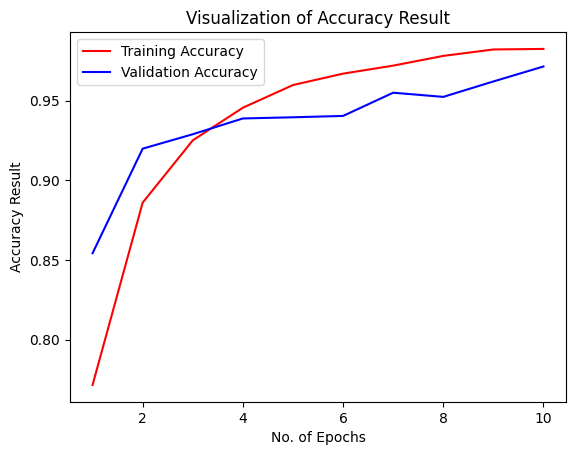

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 16s 28ms/step


(array([[9.99999881e-01, 3.90941466e-08, 1.87864429e-11, ...,
         4.39064584e-16, 1.72082062e-14, 2.86425275e-14],
        [9.99949098e-01, 5.71807504e-07, 9.30104438e-10, ...,
         8.77656021e-13, 1.85462713e-12, 2.10420015e-11],
        [1.00000000e+00, 9.58733440e-11, 1.47931949e-12, ...,
         6.96655842e-20, 3.93705447e-17, 1.06001282e-15],
        ...,
        [4.75330149e-12, 1.49433156e-17, 8.89273169e-11, ...,
         1.12800435e-13, 2.68114436e-16, 1.00000000e+00],
        [5.64968558e-11, 1.99448757e-16, 6.08846862e-11, ...,
         3.55699021e-12, 2.82900534e-14, 1.00000000e+00],
        [1.35772990e-20, 8.55720906e-23, 2.64405884e-18, ...,
         2.69098453e-21, 7.60947765e-18, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

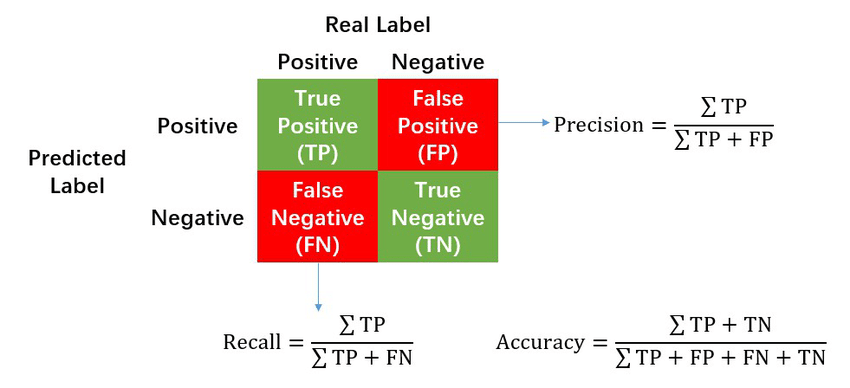

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.98      0.97      0.98       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [44]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[471,  14,   0, ...,   0,   0,   0],
       [  0, 491,   0, ...,   0,   0,   0],
       [  0,   0, 434, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 477,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  2,   0,   1, ...,   0,   0, 470]], dtype=int64)

### Confusion Matrix Visualization

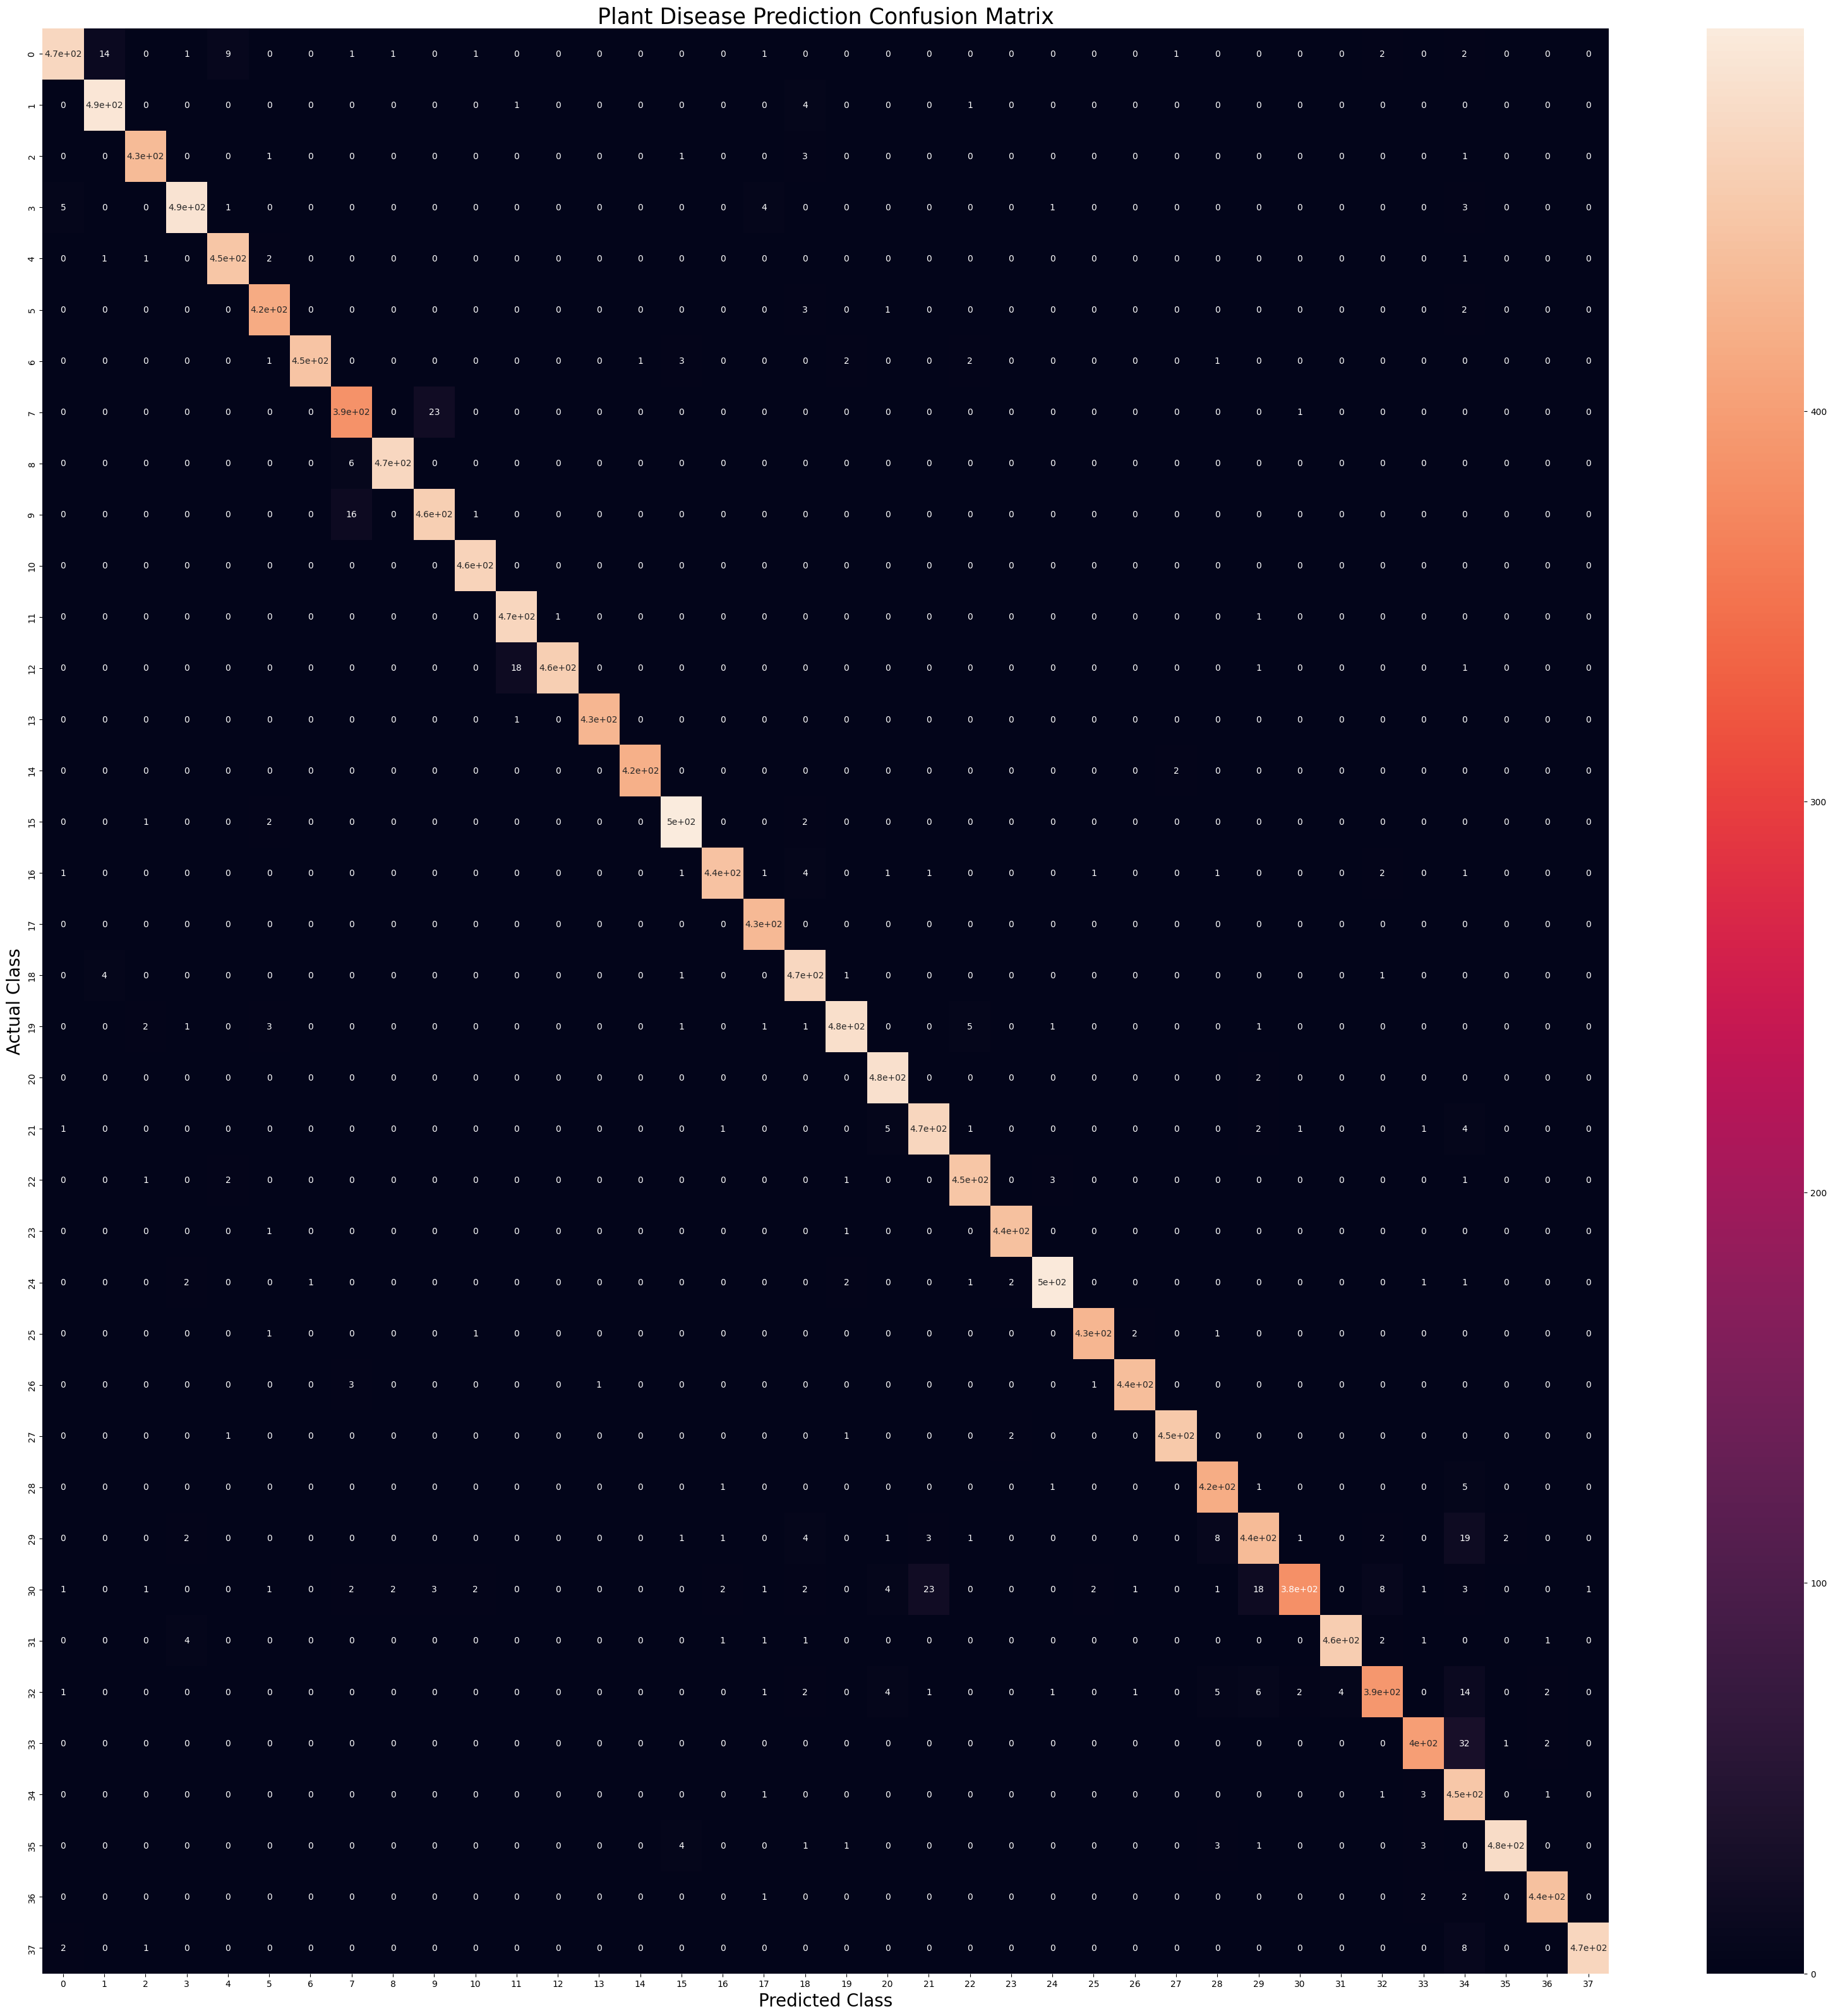

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()